X_train: (2000, 784)
Y_train: (2000,)
X_test:  (1000, 784)
Y_test:  (1000,)


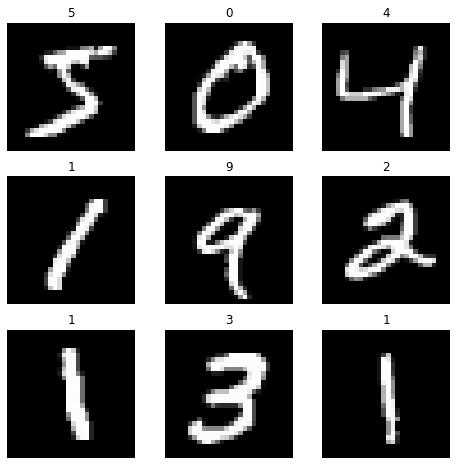

In [1]:
import pandas as pd
import numpy as np
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import seaborn as sns
import math

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = np.reshape(X_train, (-1, 784)).astype('float32')
X_test = np.reshape(X_test, (-1, 784)).astype('float32')

X_train = X_train[:2000, :]
y_train = y_train[:2000]
X_test = X_test[:1000, :]
y_test = y_test[:1000]

print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  ' + str(X_test.shape))
print('Y_test:  ' + str(y_test.shape))

plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

In [2]:
def train(X, R, n, alpha, epochs):
    W = np.random.normal(0, 1.0, (n, X_train.shape[1]))
    limit = epochs//(R+1)
    for epoch in range(1,epochs+1):
        W_old = W.copy()
        for x in X:
            j = np.sum(np.square(np.subtract(W, x).T), axis=0).argmin()
            for i in range(j-R, j+1+R):
                if i > 0 and i < 625:
                    W[i] = W[i] + (alpha * (x-W[i]))
        alpha *= 0.5
        print("epoch: ",epoch , " , R: ",R)
        if (W_old != W).sum() == 0:
            break
        if epoch % limit == 0 and R != 0:
            R -= 1
    return W


def train_2D(X, R, n, alpha, epochs):
    W = np.random.normal(0, 1.0, (n, X_train.shape[1]))
    limit = epochs//(R+1)
    for epoch in range(1, epochs+1):
        W_old = W.copy()
        for x in X:
            j = np.sum(np.square(np.subtract(W, x).T), axis=0).argmin()
            if R==0:
                indexes = [j]
            else:
                indexes = [j, j-(R *25), j+(R*25), j-R, j+R]
            for i in indexes:
                if i < 624 and i > 0 and i < (j//25+1)*25 and i > (j//25-1)*25:
                    W[i] = W[i] + (alpha * (x-W[i]))
        alpha *= 0.5
        print("epoch: ",epoch , " , R: ",R)
        if (W_old != W).sum() == 0:
            break
        if epoch % limit == 0 and R != 0:
            R -= 1
    return W


def test(X, y, W):
    num_test = list(pd.DataFrame(y, columns=["y"]).value_counts())
    num_test.reverse()

    clusters = []
    heatmap = np.zeros((W.shape[0], 10))

    for i in range(X.shape[0]):
        j = np.sum(np.square(np.subtract(W, X[i]).T), axis=0).argmin()
        clusters.append([j, y[i]])
        heatmap[j, y[i]] += 1
    heatmap = pd.DataFrame(heatmap)
    heatmap = heatmap[(heatmap.T != 0).any()] / num_test
    heatmap["max"] = heatmap.idxmax(axis=1)
    clusters = pd.DataFrame(clusters, columns=["cluster", "y_true"])
    return (heatmap, clusters)


epoch:  1  , R:  0
epoch:  2  , R:  0
epoch:  3  , R:  0
epoch:  4  , R:  0
epoch:  5  , R:  0
epoch:  6  , R:  0
epoch:  7  , R:  0
epoch:  8  , R:  0
epoch:  9  , R:  0
epoch:  10  , R:  0
epoch:  11  , R:  0
epoch:  12  , R:  0
epoch:  13  , R:  0
epoch:  14  , R:  0
epoch:  15  , R:  0
epoch:  16  , R:  0
epoch:  17  , R:  0
epoch:  18  , R:  0
epoch:  19  , R:  0
epoch:  20  , R:  0
Number of Non-empty Neurons: 57


,cluster,y_true
0,228,7
1,199,2
2,55,1
3,599,0
4,241,4
...,...,...
995,373,2
996,199,2
997,227,0
998,133,8


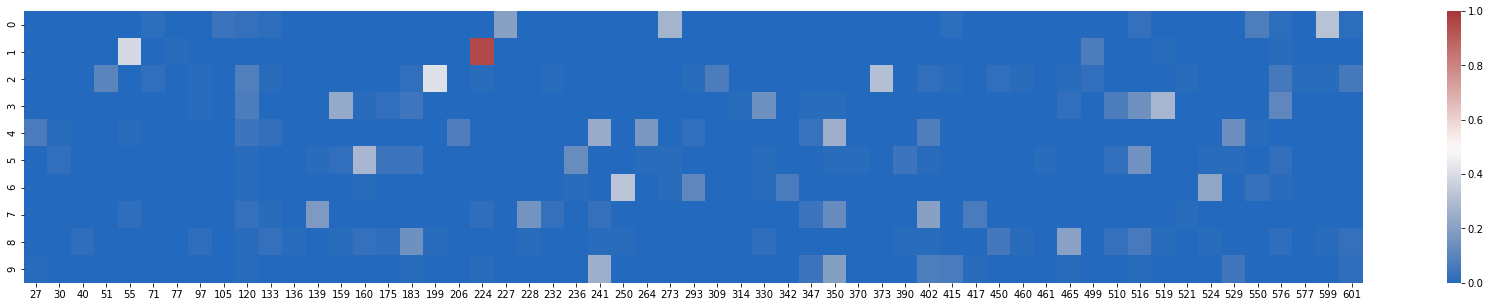

In [3]:
W0 = train(X = X_train,R = 0,n =625 , alpha = 0.6,epochs=20)
heatmap0 , clusters0 = test(X=X_test,y=y_test,W=W0)

plt.figure(figsize=(30,5))
sns.heatmap(heatmap0.iloc[:,:10].T,cmap="vlag",vmin=0, vmax=1)
print("Number of Non-empty Neurons:",clusters0.groupby("cluster").first().shape[0])
clusters0

In [17]:
pd.DataFrame(clusters0.groupby("cluster")['y_true'].apply(list)).head(10)

,y_true
cluster,
27,"[4, 4, 4, 9, 4, 4, 4]"
30,"[5, 5, 4]"
40,"[8, 8]"
51,"[2, 2, 2, 2, 2, 2, 2, 2, 2]"
55,"[1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, ..."
71,"[2, 2, 0]"
77,[1]
97,"[2, 3, 8, 8]"
105,"[0, 0, 0]"


epoch:  1  , R:  2
epoch:  2  , R:  2
epoch:  3  , R:  2
epoch:  4  , R:  2
epoch:  5  , R:  2
epoch:  6  , R:  2
epoch:  7  , R:  1
epoch:  8  , R:  1
epoch:  9  , R:  1
epoch:  10  , R:  1
epoch:  11  , R:  1
epoch:  12  , R:  1
epoch:  13  , R:  0
epoch:  14  , R:  0
epoch:  15  , R:  0
epoch:  16  , R:  0
epoch:  17  , R:  0
epoch:  18  , R:  0
epoch:  19  , R:  0
epoch:  20  , R:  0
Number of Non-empty Neurons: 300


,cluster,y_true
0,586,7
1,1,2
2,21,1
3,205,0
4,155,4
...,...,...
995,185,2
996,4,2
997,203,0
998,448,8


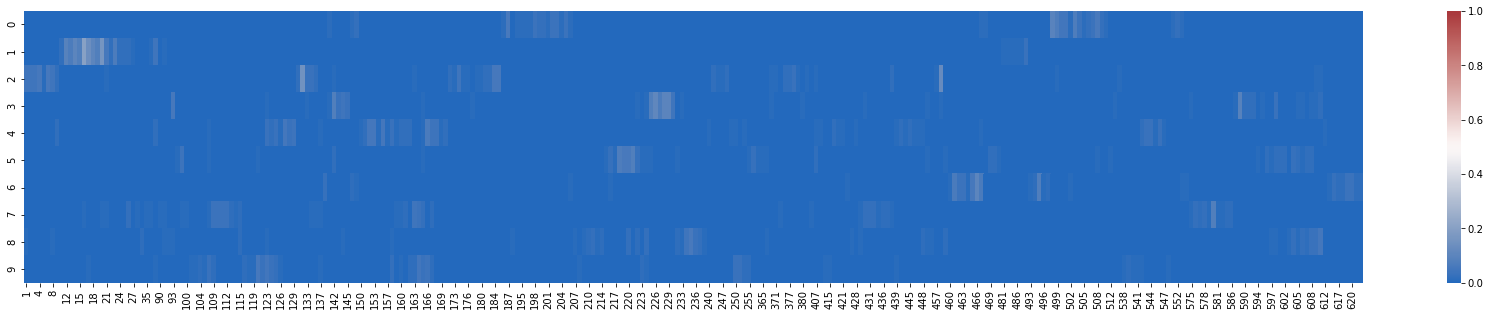

In [5]:
W2 = train(X = X_train,R = 2,n =625 , alpha = 0.6,epochs=20)
heatmap2 , clusters2 = test(X=X_test,y=y_test,W=W2)

plt.figure(figsize=(30,5))
sns.heatmap(heatmap2.iloc[:,:10].T,cmap="vlag",vmin=0, vmax=1)
print("Number of Non-empty Neurons:",clusters2.groupby("cluster").first().shape[0])
clusters2

In [15]:
pd.DataFrame(clusters2.groupby("cluster")['y_true'].apply(list)).head(10)

,y_true
cluster,
1,"[2, 2, 2, 8, 2]"
2,"[2, 2, 2, 2]"
3,"[2, 2, 2, 2]"
4,"[2, 2, 2, 2, 2]"
6,[2]
7,"[2, 2, 2, 2, 2]"
8,"[2, 2, 2, 8, 2]"
9,"[4, 2, 4, 2]"
11,"[1, 1]"


epoch:  1  , R:  1
epoch:  2  , R:  1
epoch:  3  , R:  1
epoch:  4  , R:  1
epoch:  5  , R:  1
epoch:  6  , R:  1
epoch:  7  , R:  1
epoch:  8  , R:  1
epoch:  9  , R:  1
epoch:  10  , R:  1
epoch:  11  , R:  0
epoch:  12  , R:  0
epoch:  13  , R:  0
epoch:  14  , R:  0
epoch:  15  , R:  0
epoch:  16  , R:  0
epoch:  17  , R:  0
epoch:  18  , R:  0
epoch:  19  , R:  0
epoch:  20  , R:  0
Number of Non-empty Neurons: 324


,cluster,y_true
0,238,7
1,360,2
2,509,1
3,393,0
4,66,4
...,...,...
995,331,2
996,355,2
997,57,0
998,215,8


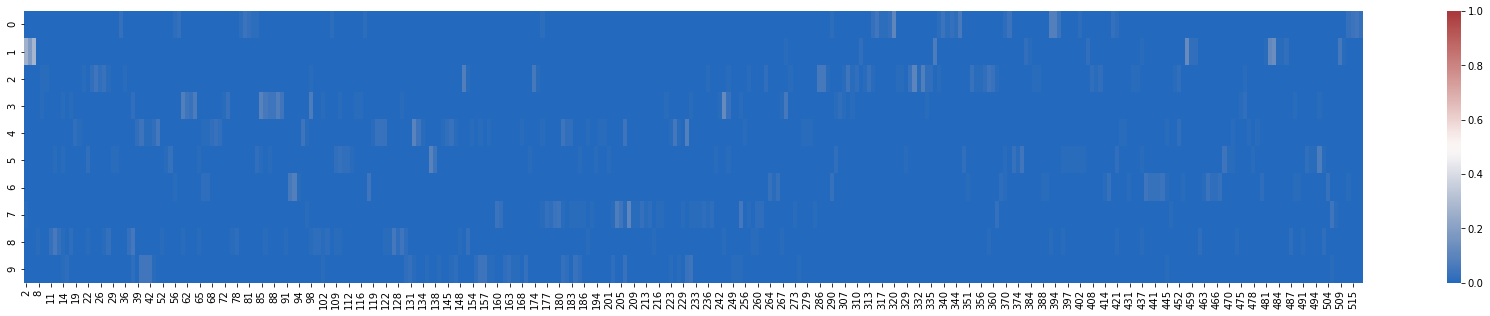

In [10]:
W_2d = train_2D(X = X_train,R = 1,n =625 , alpha = 0.6,epochs=20)
heatmap2D , clusters2D = test(X=X_test,y=y_test,W=W_2d)

plt.figure(figsize=(30,5))
sns.heatmap(heatmap2D.iloc[:,:10].T,cmap="vlag",vmin=0, vmax=1)
print("Number of Non-empty Neurons:",clusters2D.groupby("cluster").first().shape[0])
clusters2D

In [16]:
pd.DataFrame(clusters2D.groupby("cluster")['y_true'].apply(list)).head(10)

,y_true
cluster,
2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, ..."
3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
4,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
8,[8]
9,"[3, 2]"
10,[2]
11,"[8, 8, 8]"
12,"[8, 8, 8, 8, 8, 8, 8, 5]"
13,"[8, 8, 8]"


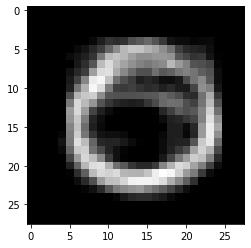

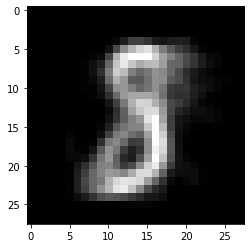

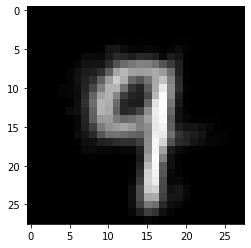

In [13]:
clus_index = clusters2D.cluster.unique()
for i in [2,6,8]:
    plt.imshow(W2[clus_index[i]].reshape(28,28),cmap=plt.get_cmap('gray'))
    plt.show()